In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf        
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from itertools import product
from scipy.optimize import minimize
from dateutil.relativedelta import relativedelta
from statsmodels.tsa.stattools import adfuller


from statsmodels.tsa.seasonal import seasonal_decompose

import warnings                         
warnings.filterwarnings('ignore')

%matplotlib inline

## Data Collection

##### To read the date column correctly, we can use the argument parse_dates to specify a list of date columns. Here the variable "data" is the data frame and data.head() is used to display the first five rows of dataset

In [2]:
data = pd.read_csv("data_set/salesdaily.csv",parse_dates=['datum'],index_col = 'datum')
data.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


#### data.tail() is used to display last five rows of the dataset 

In [3]:
data.tail()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2019-10-04,7.34,5.683,2.25,22.45,13.0,0.0,1.0,1.00,2019,10,276,Friday
2019-10-05,3.84,5.010,6.00,25.40,7.0,0.0,0.0,0.33,2019,10,276,Saturday
2019-10-06,4.00,11.690,2.00,34.60,6.0,0.0,5.0,4.20,2019,10,276,Sunday
2019-10-07,7.34,4.507,3.00,50.80,6.0,0.0,10.0,1.00,2019,10,276,Monday
2019-10-08,0.33,1.730,0.50,44.30,20.0,2.0,2.0,0.00,2019,10,190,Tuesday


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M01AB         2106 non-null   float64
 1   M01AE         2106 non-null   float64
 2   N02BA         2106 non-null   float64
 3   N02BE         2106 non-null   float64
 4   N05B          2106 non-null   float64
 5   N05C          2106 non-null   float64
 6   R03           2106 non-null   float64
 7   R06           2106 non-null   float64
 8   Year          2106 non-null   int64  
 9   Month         2106 non-null   int64  
 10  Hour          2106 non-null   int64  
 11  Weekday Name  2106 non-null   object 
dtypes: float64(8), int64(3), object(1)
memory usage: 213.9+ KB


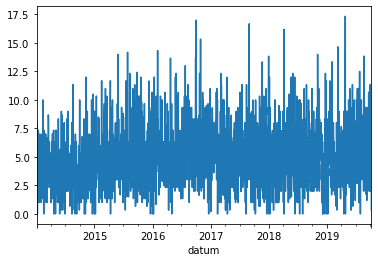

In [5]:
data['M01AB'].plot()

#### The above plot is single drug's line plot. Let's plot all colums using subplots  

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e0bf326d0>,
      dtype=object)

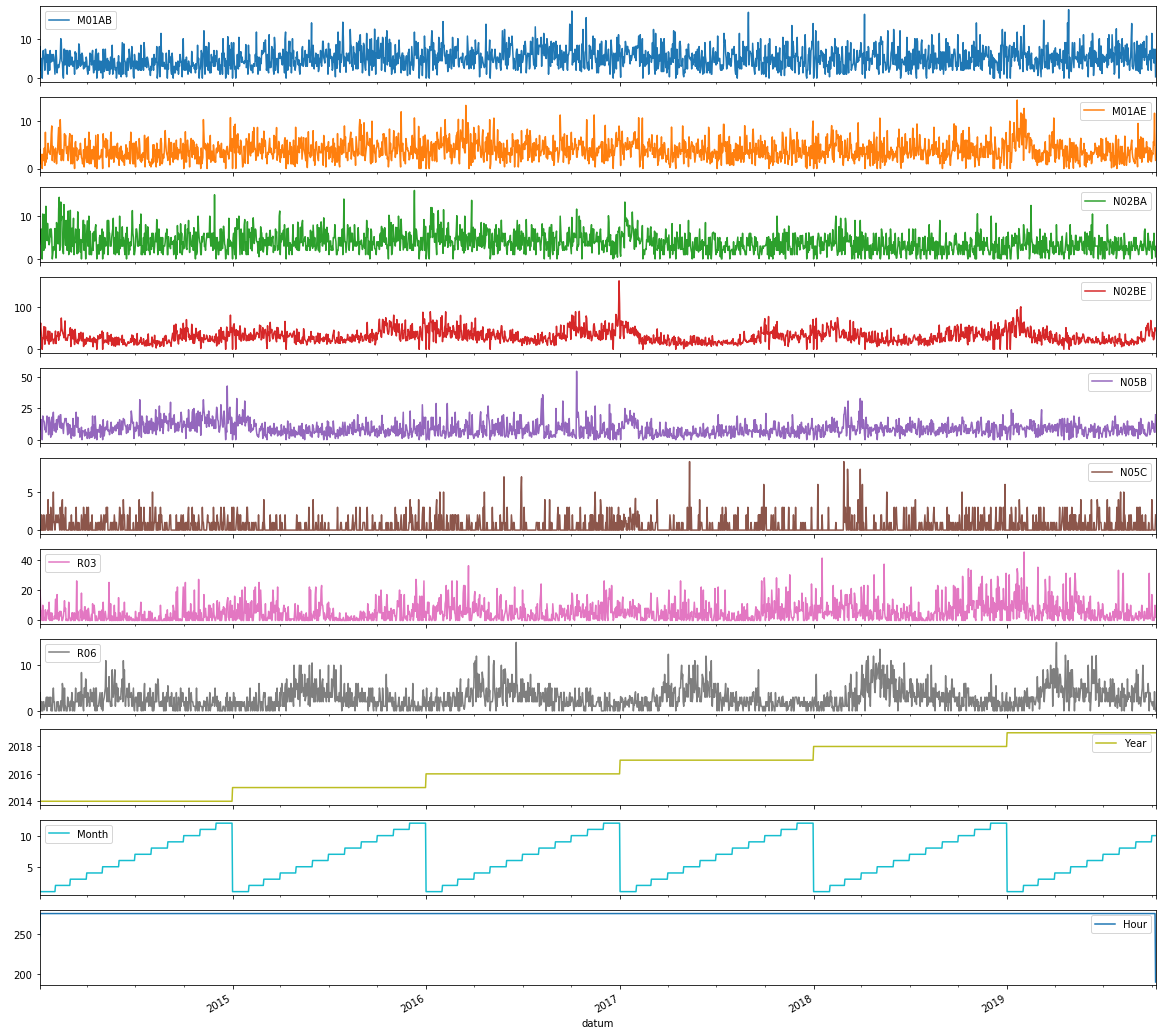

In [6]:
data.plot(subplots = True, figsize = (20,20))

### The line plots used above are good for showing seasonality.
#### Seasonality : In TS data, seasonality is the presence of variations that occur at specific regular time intervals less than a year, such as hourly, weekly, monthly, quaterly, yearly. So it is the repeating short-term cycle in a series or it can also be periodic fluctuation 

In [7]:
cols = ["M01AB","M01AE","N02BA","N02BE","N05B","N05C","R03","R06"]

In [8]:
def plot_graph(data,cols):
    fig = plt.figure(figsize=(20, 20))
    for loc, col in enumerate(cols):
        plt.subplot(3, 3, loc+1)
        plt.plot(data[col])
        plt.title(col) 

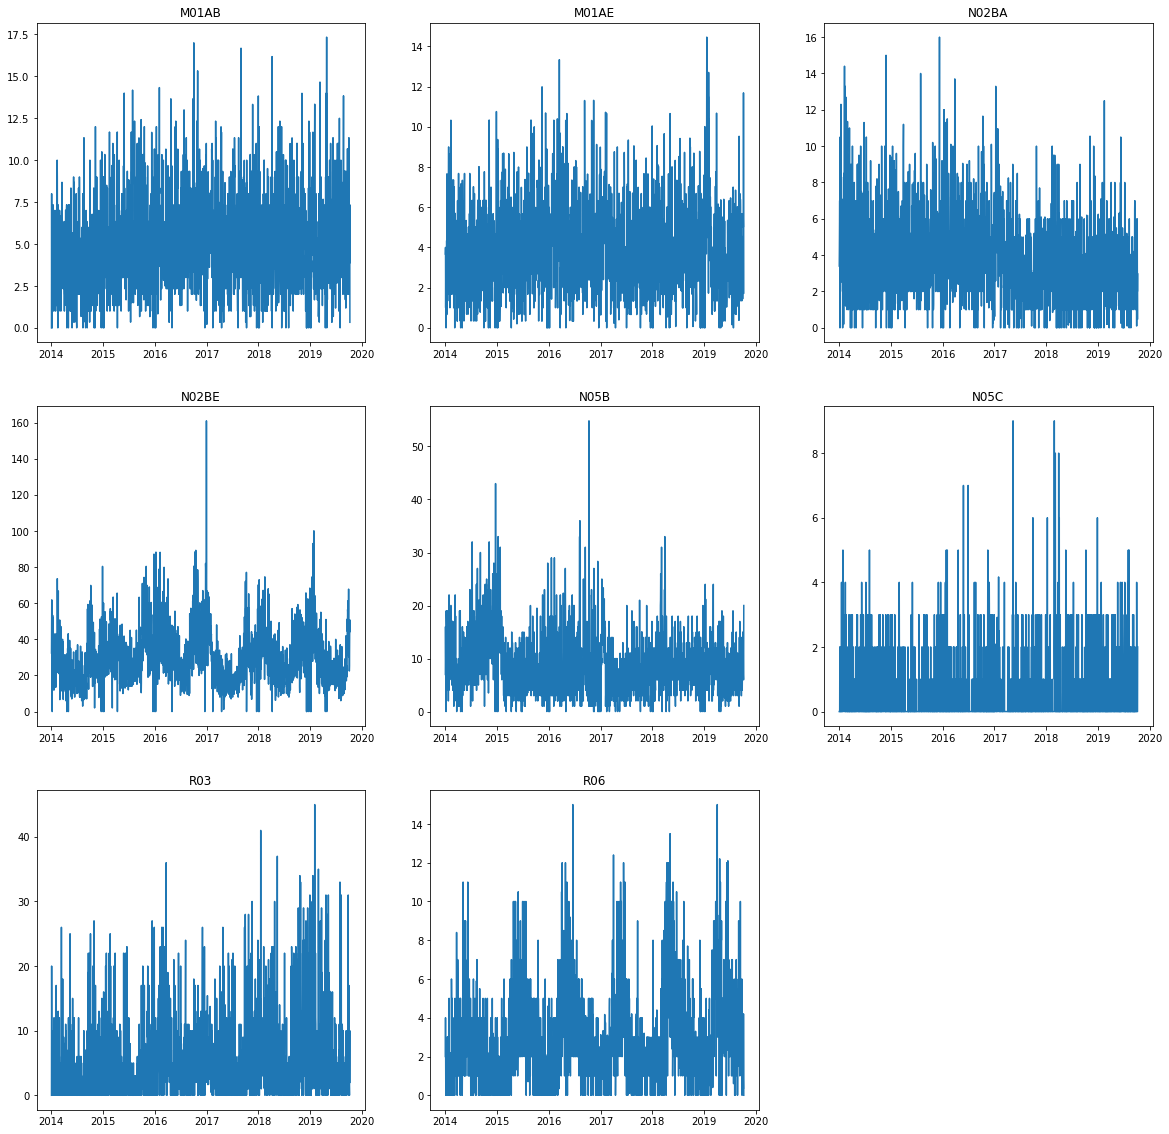

In [9]:
plot_graph(data,cols)

#### The above plots are line plots of drugs which are handy to check their seasonality, trends of drugs.

## Data Preprocessing

### Resampling 

#### This data is in chronological order, just to verrify it again sorting of the data frame is done below by the time stamps and the timestamps are equvidistant in time series.

<BarContainer object of 6 artists>

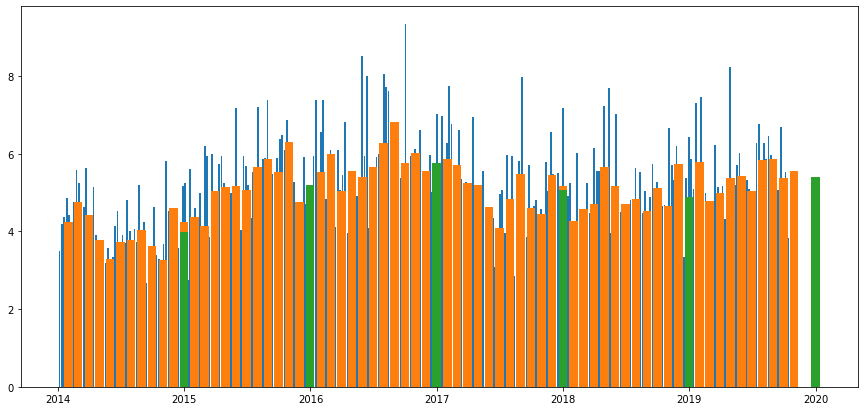

In [10]:
# Resampling the time series data based on monthly 'M',W yearly 'Y', weekly 'W' frequency
df_month = data.resample("M").mean()
df_year = data.resample("Y").mean()
df_week = data.resample("W").mean()
# using subplot
fig, ax = plt.subplots(figsize=(15,7))
  
# plotting bar graph
ax.bar(df_week['2014':].index, 
       df_week.loc['2014':, "M01AB"], 
       width= 5, align='center')
ax.bar(df_month['2014':].index, 
       df_month.loc['2014':, "M01AB"], 
       width= 25, align='center')
ax.bar(df_year['2014':].index, 
       df_year.loc['2014':, "M01AB"], 
       width= 25, align='center')

### Resampling of all drugs weekly, montly and  yearly

In [11]:
def plot_graph(df_week,cols):
    fig = plt.figure(figsize=(20, 20))
    for loc, col in enumerate(cols):
        plt.subplot(3, 3, loc+1)
        plt.plot(df_week[col])
        plt.title(col,fontsize=14) 
        

In [12]:
data = data.sort_values(by='datum')
data.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


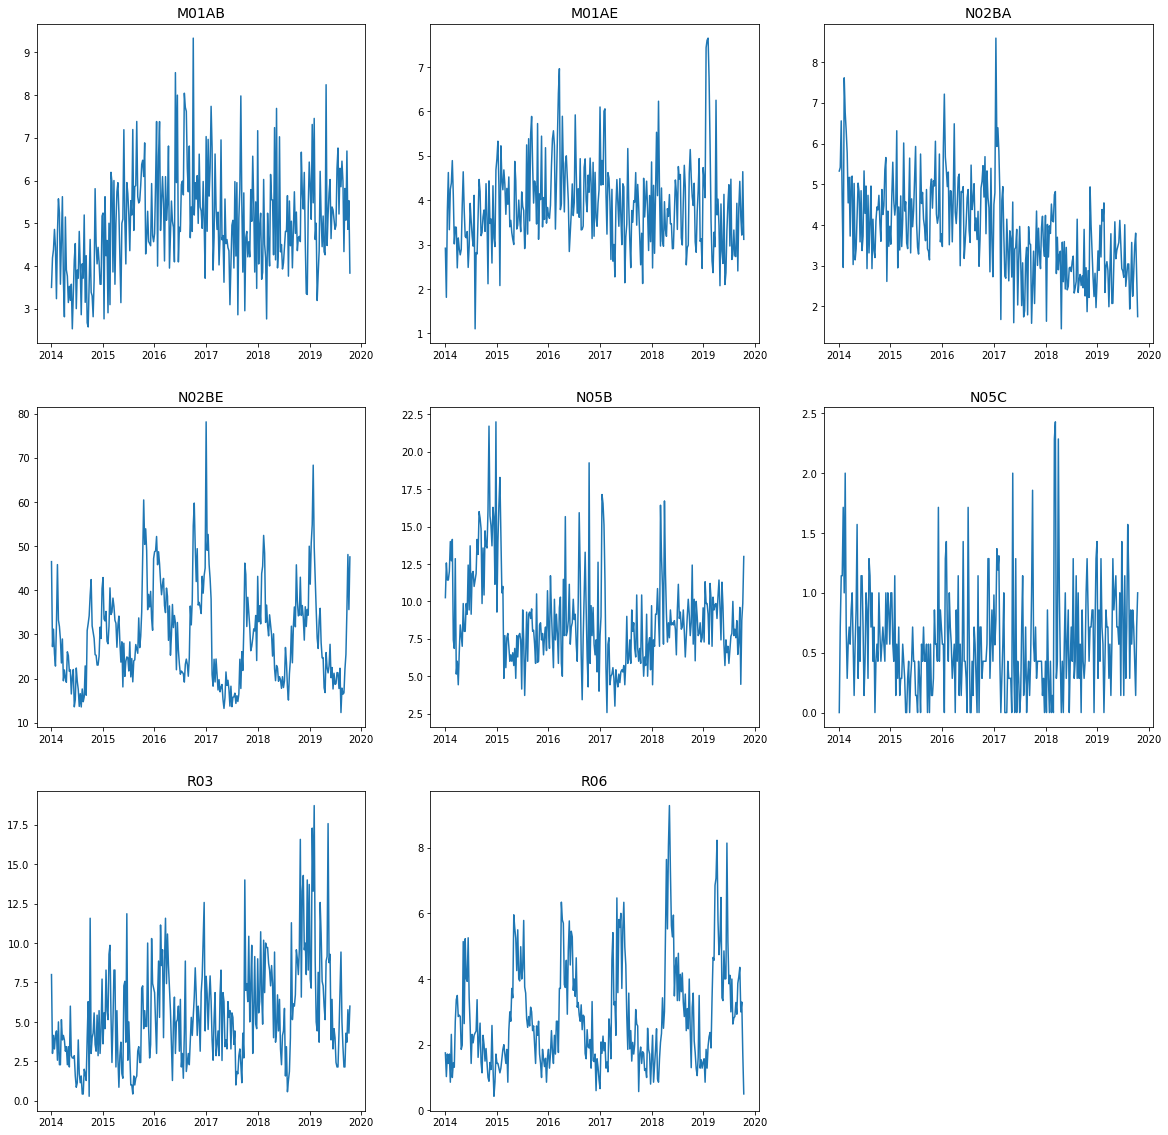

In [13]:
plot_graph(df_week,cols)

In [14]:
def plot_graph(df_month,cols):
    fig = plt.figure(figsize=(20, 20))
    for loc, col in enumerate(cols):
        plt.subplot(3, 3, loc+1)
        plt.plot(df_month[col])
        plt.title(col,fontsize=14) 

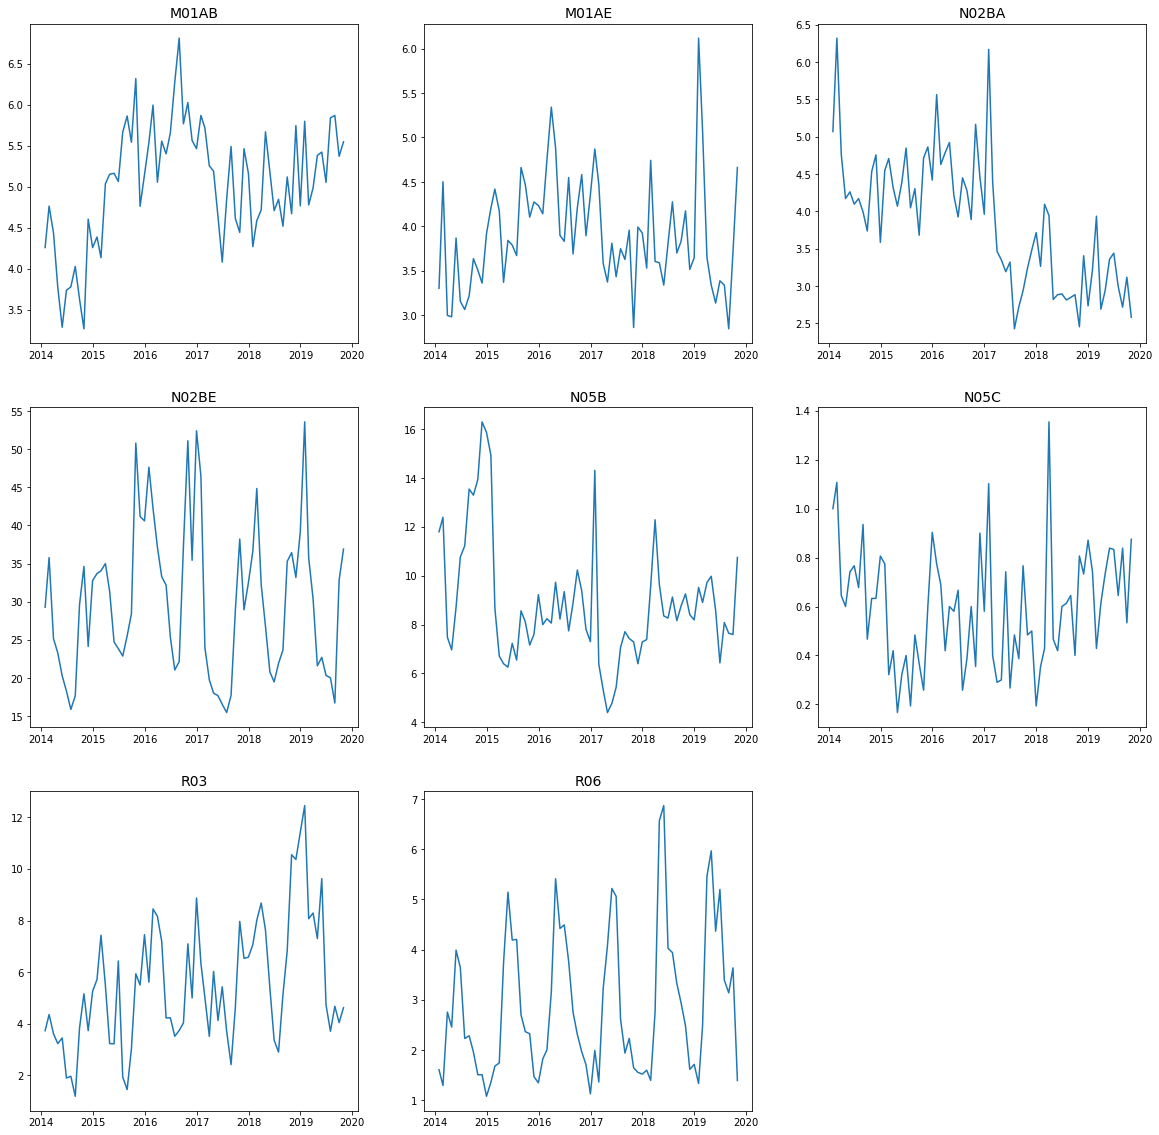

In [15]:
plot_graph(df_month,cols)

In [16]:
def plot_graph(df_year,cols):
    fig = plt.figure(figsize=(20, 20))
    for loc, col in enumerate(cols):
        plt.subplot(3, 3, loc+1)
        plt.plot(df_year[col])
        plt.title(col,fontsize=14) 

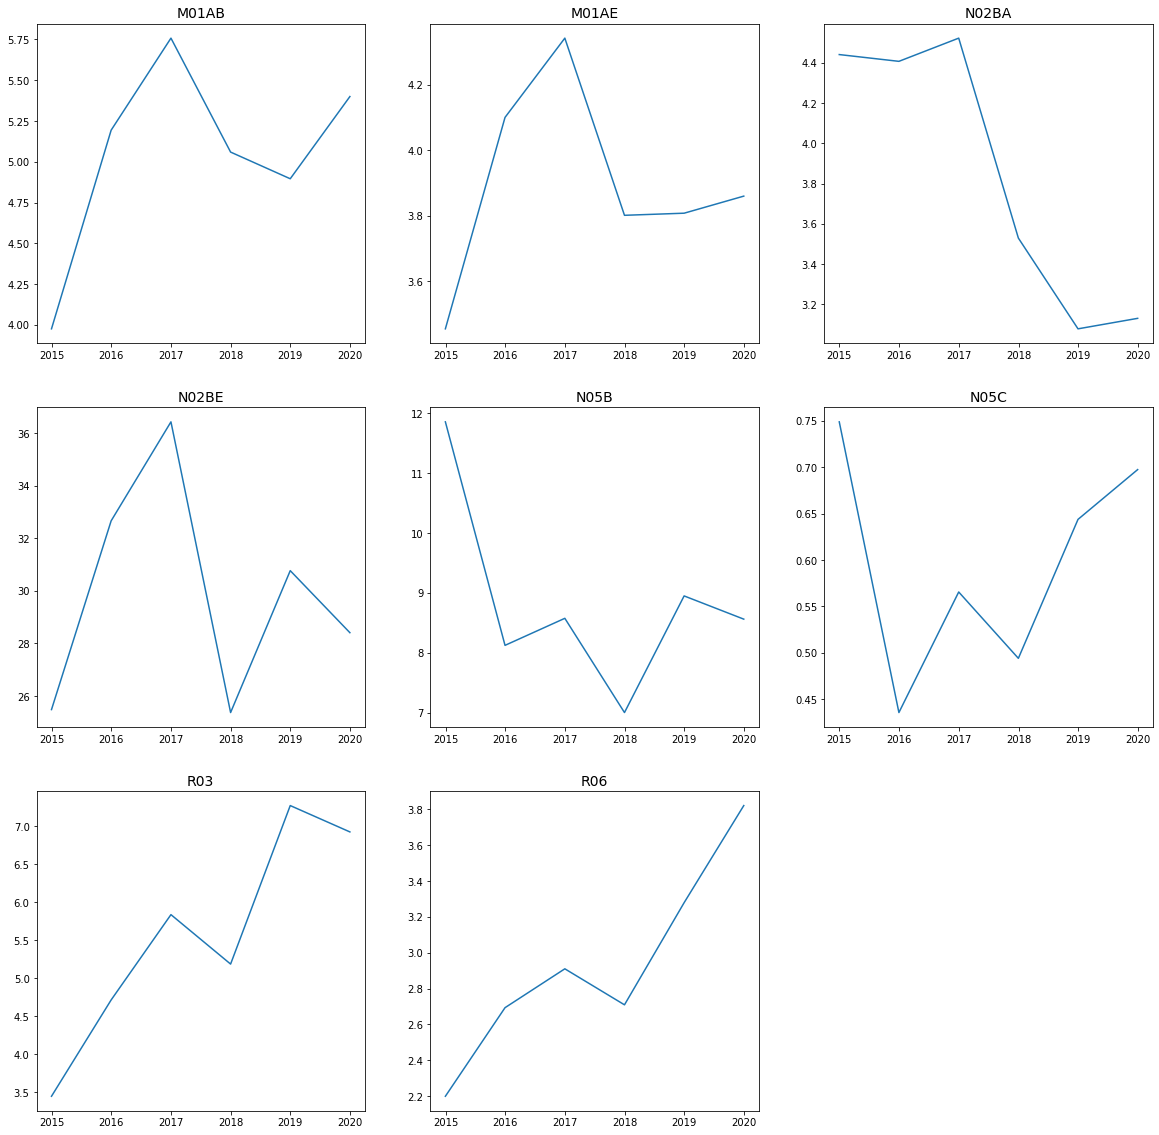

In [17]:
plot_graph(df_year,cols)

### Stationary test : ADF 

In [18]:
for col in cols:
    print(col)
    col_data = data[col]
    result = adfuller(col_data)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if(result[1] <= 0.05):
        print('\tReject Null Hypothesis : Stationary\n')
    else :
        print('\tAccept Null Hypothesis : Non-Stationary\n')

M01AB
ADF Statistic: -8.279357
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568
	Reject Null Hypothesis : Stationary

M01AE
ADF Statistic: -7.472604
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568
	Reject Null Hypothesis : Stationary

N02BA
ADF Statistic: -6.135330
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568
	Reject Null Hypothesis : Stationary

N02BE
ADF Statistic: -4.193657
p-value: 0.000675
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568
	Reject Null Hypothesis : Stationary

N05B
ADF Statistic: -4.779480
p-value: 0.000060
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568
	Reject Null Hypothesis : Stationary

N05C
ADF Statistic: -15.140289
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568
	Reject Null Hypothesis : Stationary

R03
ADF Statistic: -5.128090
p-value: 0.000012
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.568
	Reject Null Hypothesis : Stationary

R06
ADF Statisti

In [19]:
results = adfuller(data.M01AE)
print('ADF Statistic:',results[0])
print('p-value:',results[1])

ADF Statistic: -7.4726044297065455
p-value: 5.008856420708312e-11


### Making a time series stationary

- Differencing
- Transformations

### <center> Differencing

Subtracting previous values at a given frequency for each data point

### Lag-1 Differencing 

#### For each data point, subtract the previous data point.

In [20]:
data.head()

,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06,Year,Month,Hour,Weekday Name
datum,,,,,,,,,,,,
2014-01-02,0.0,3.67,3.4,32.40,7.0,0.0,0.0,2.0,2014,1,248,Thursday
2014-01-03,8.0,4.00,4.4,50.60,16.0,0.0,20.0,4.0,2014,1,276,Friday
2014-01-04,2.0,1.00,6.5,61.85,10.0,0.0,9.0,1.0,2014,1,276,Saturday
2014-01-05,4.0,3.00,7.0,41.10,8.0,0.0,3.0,0.0,2014,1,276,Sunday
2014-01-06,5.0,1.00,4.5,21.70,16.0,2.0,6.0,2.0,2014,1,276,Monday


In [21]:
df = pd.DataFrame(data, columns=['M01AB']) 
df.head()

,M01AB
datum,
2014-01-02,0.0
2014-01-03,8.0
2014-01-04,2.0
2014-01-05,4.0
2014-01-06,5.0


In [22]:
#data['Lag-1'] = data.M01AB.diff(periods=1)
df['Lag-1'] = df.diff(axis = 0,periods=1)


In [23]:
df.head()

,M01AB,Lag-1
datum,,
2014-01-02,0.0,NaN
2014-01-03,8.0,8.0
2014-01-04,2.0,-6.0
2014-01-05,4.0,2.0
2014-01-06,5.0,1.0


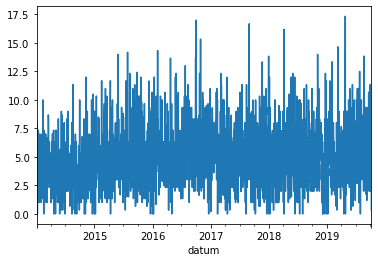

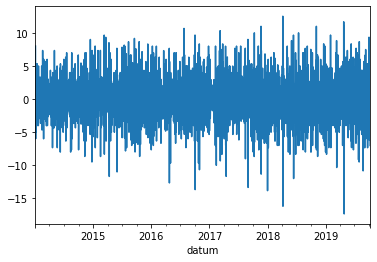

In [24]:
df['M01AB'].plot(); plt.show()
df['Lag-1'].plot()

In [25]:
df['Lag-1'] = df.diff(axis = 0,periods=1)

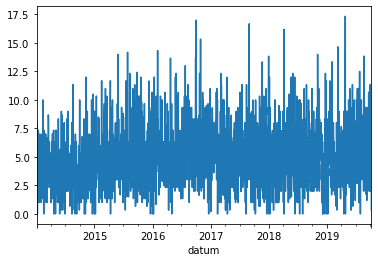

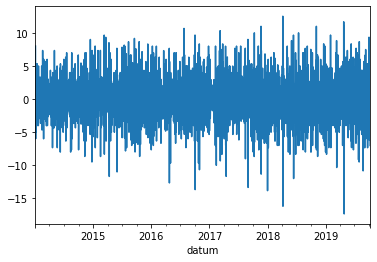

In [26]:
df['M01AB'].plot(); plt.show()
df['Lag-1'].plot()

In [27]:
df['Lag-2'] = df['Lag-1'].shift(1)
df.head()

,M01AB,Lag-1,Lag-2
datum,,,
2014-01-02,0.0,NaN,NaN
2014-01-03,8.0,8.0,NaN
2014-01-04,2.0,-6.0,8.0
2014-01-05,4.0,2.0,-6.0
2014-01-06,5.0,1.0,2.0


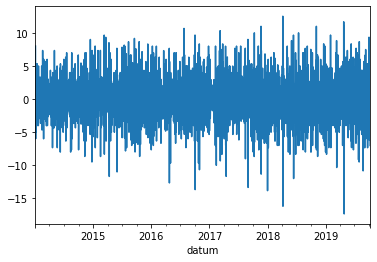

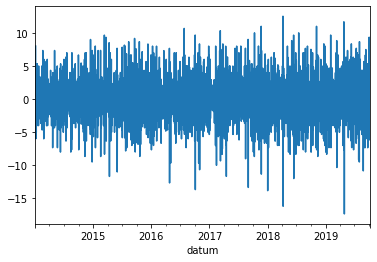

In [28]:
df['Lag-1'].plot(); plt.show()
df['Lag-2'].plot()

### Decomposition

- Decomposition procedures are used in time series to describe the trend and seasonal factors in a time series
- Basic Structures
- The following two structures are considered for basic decomposition models:

     - Additive:  = Trend + Seasonal + Residual
     - Multiplicative:  = Trend * Seasonal * Residual
     - The “Residual” term is often called “Irregular”
     
- How to Choose Between Additive and Multiplicative Decompositions
     - The additive model is useful when the seasonal variation is relatively constant over time.
     - The multiplicative model is useful when the seasonal variation increases over time. 
- Note!
  - The seasonal pattern is a regularly repeating pattern.
  - The seasonal effects are usually adjusted so that they average to 0 for an additive decomposition or they average to 1 for a multiplicative decomposition.
  - The second step is to “de-trend” the series. For an additive decomposition, this is done by subtracting the trend estimates from the series. For a multiplicative decomposition, this is done by dividing the series by the trend values.
  - The simplest method for estimating these effects is to average the de-trended values for a specific season
  - The final step is to determine the Residual (irregular) component.
    - For the additive model, Residual = series – trend – seasonal.
    - For the multiplicative model, Residual = series / (trend * seasonal)

In [29]:
def decomposition(data,col):
    decompose_result = seasonal_decompose(data[col],model='additive')
    decompose_result.plot()
    
    trend =  decompose_result.trend
    seasonal =  decompose_result.seasonal
    residual =  decompose_result.resid

    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(data[col], label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title(col,fontsize=14)


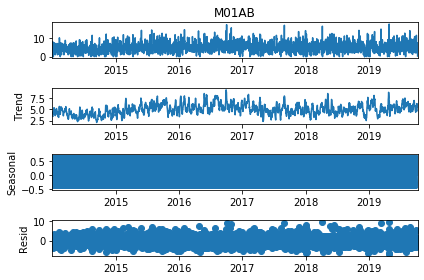

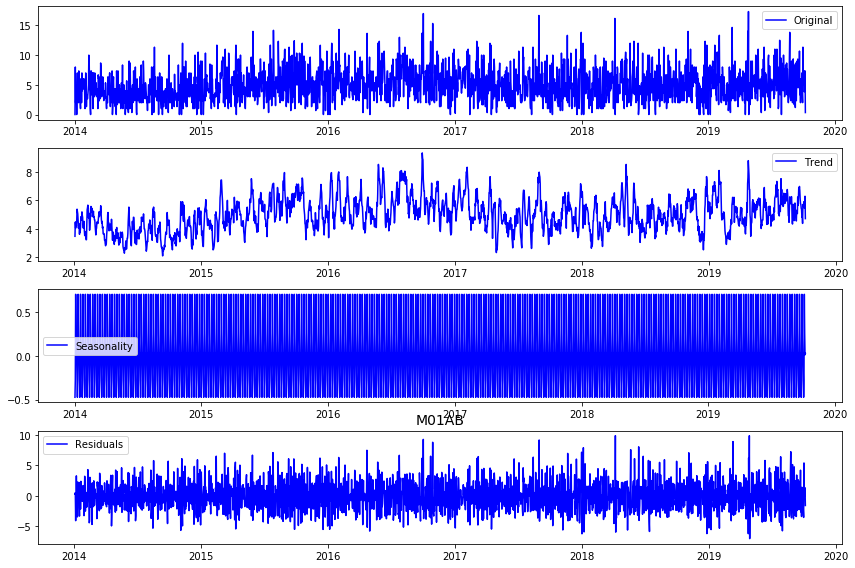

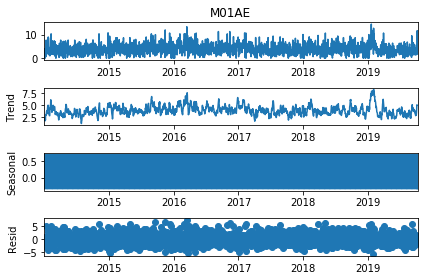

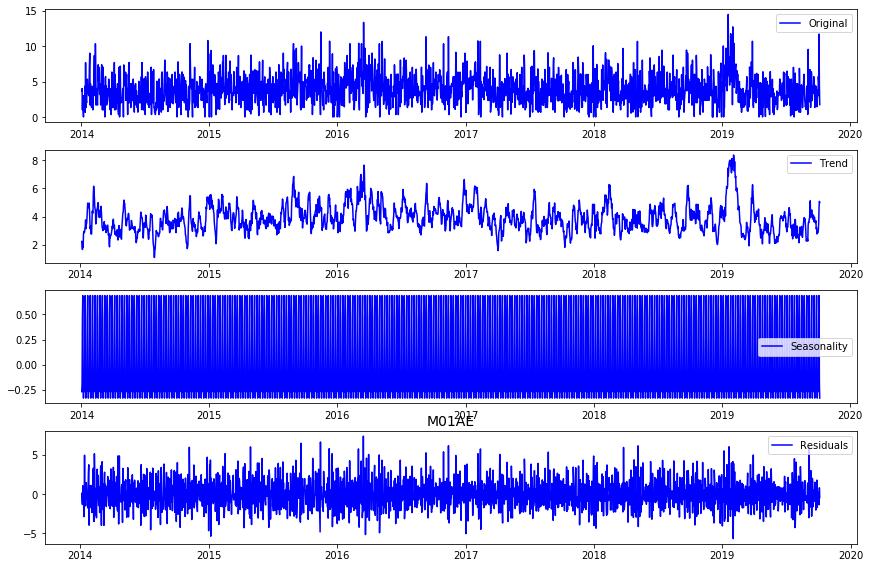

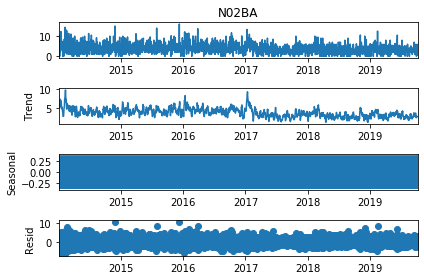

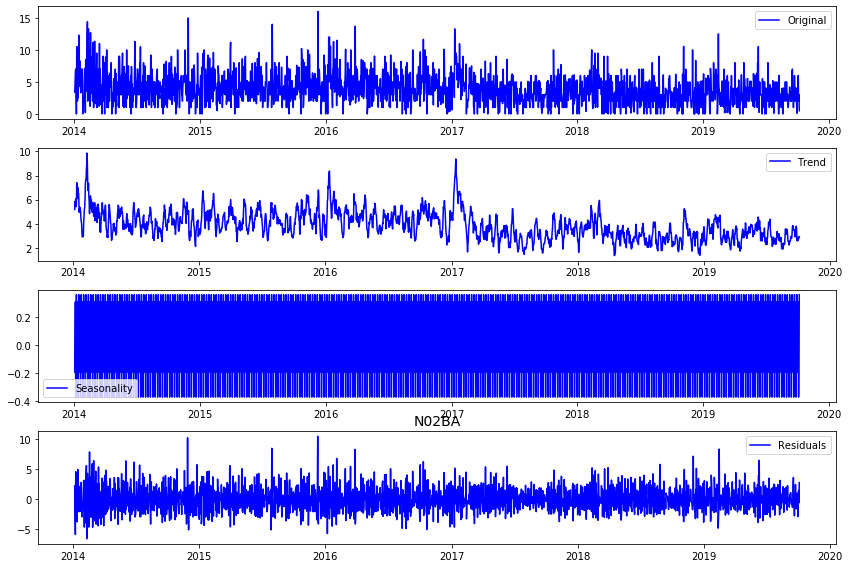

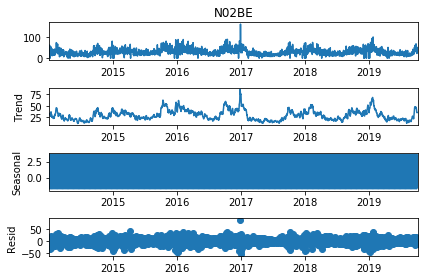

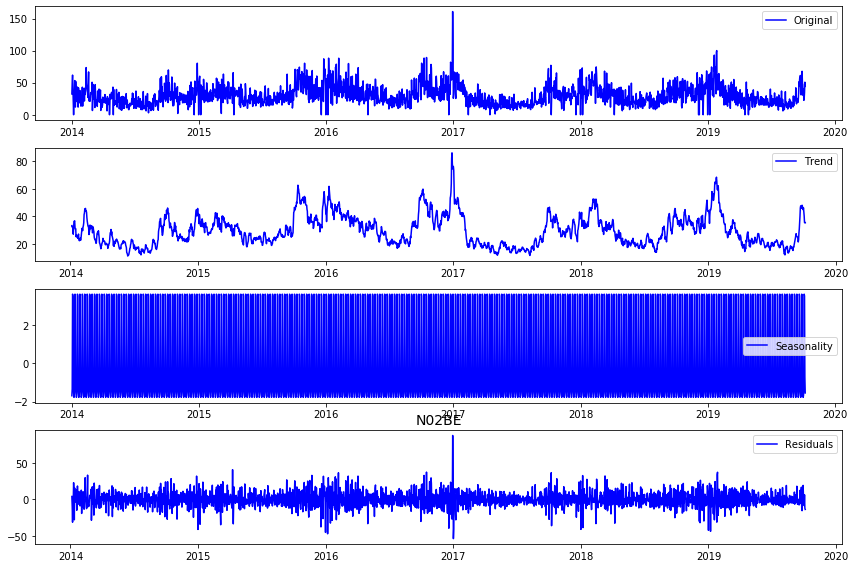

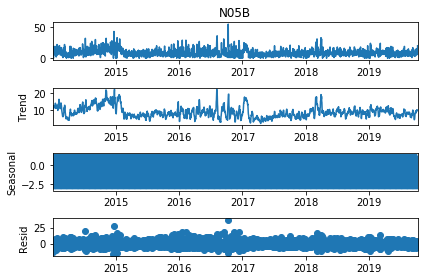

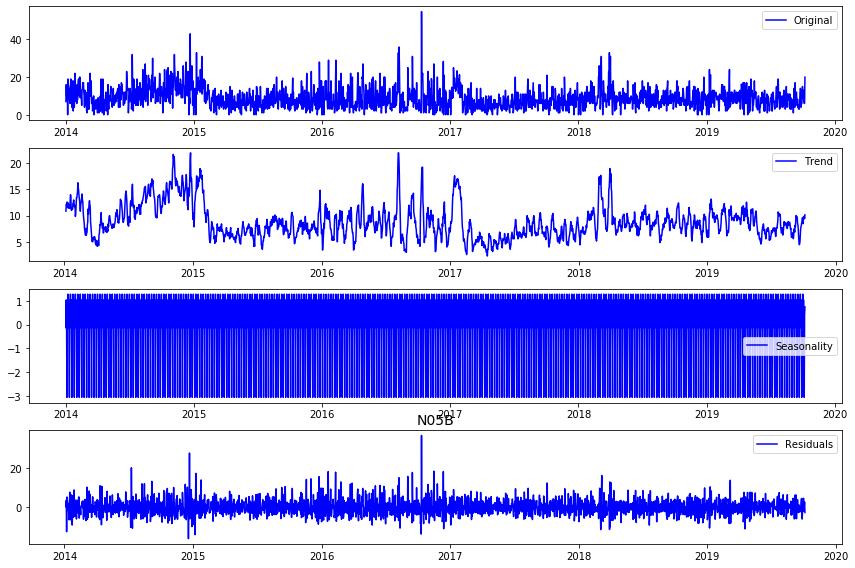

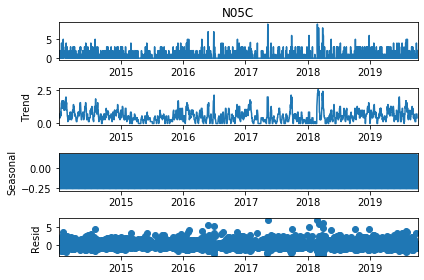

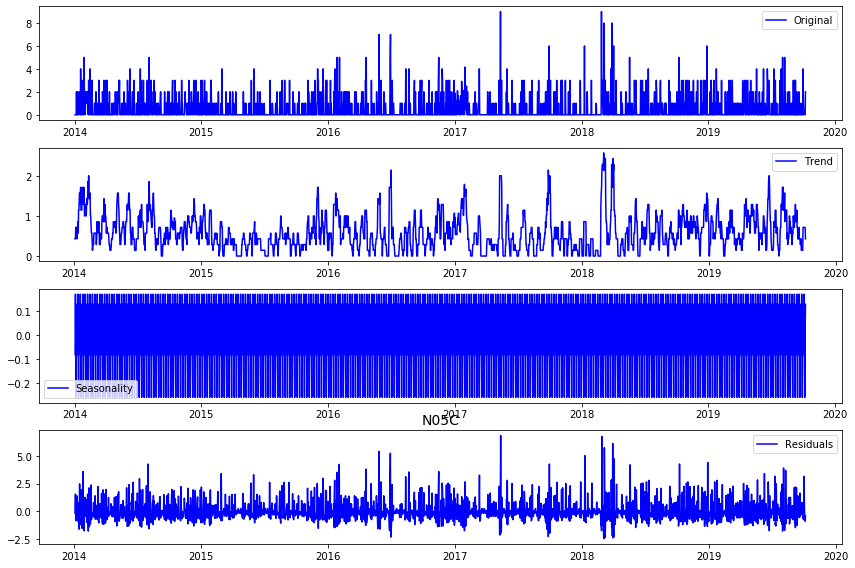

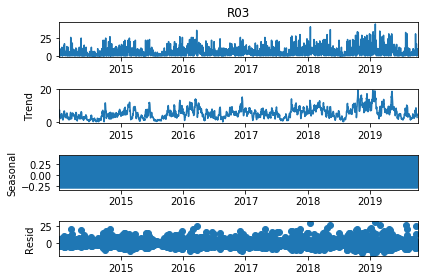

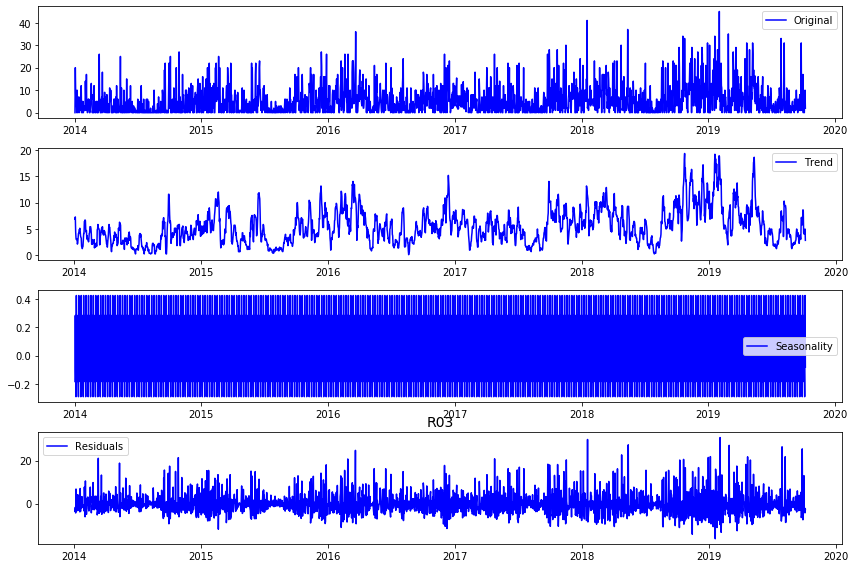

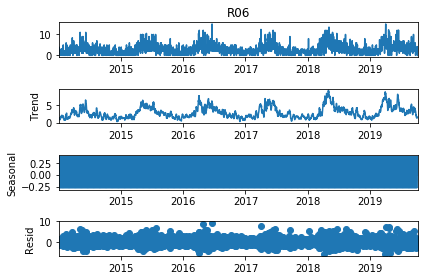

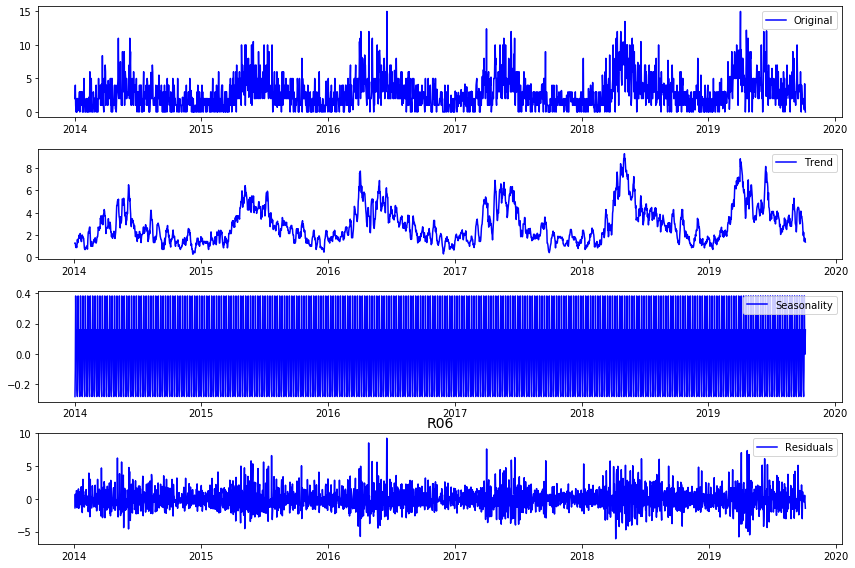

In [30]:
for col in cols:
    decomposition(data,col)

In [31]:
def decomposition(data,col):
    decompose_result = seasonal_decompose(data[col],model='multiplicative')
    
    trend =  decompose_result.trend
    seasonal =  decompose_result.seasonal
    residual =  decompose_result.resid

    plt.figure(figsize=(12,8))
    plt.subplot(411)
    plt.plot(data[col], label='Original', color='blue')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title(col)
    print("\n")

In [32]:
for col in cols:
    decomposition(data,col)

ValueError: Multiplicative seasonality is not appropriate for zero and negative values

#### here for this daily_sales data, decomposition using multiplicative model is not possible as the data has some zeros and negative values

## <center> Rolling Mean

#### M01AB

M01AB


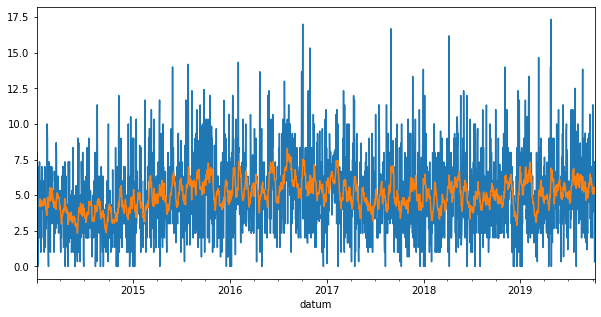

In [45]:
print("M01AB")
df['M01AB'].plot()
df['M01AB'].rolling(window=12).mean().plot(figsize = (10,5))

#### Logarithmic Transformation 

M01AB


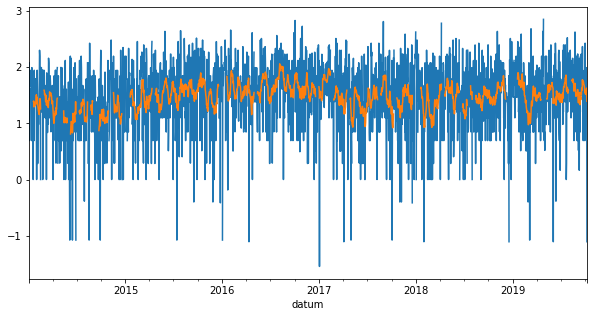

In [39]:
print('M01AB')
np.log(df['M01AB']).plot()
np.log(df['M01AB']).rolling(window=12).mean().plot(figsize = (10,5))

M01AB


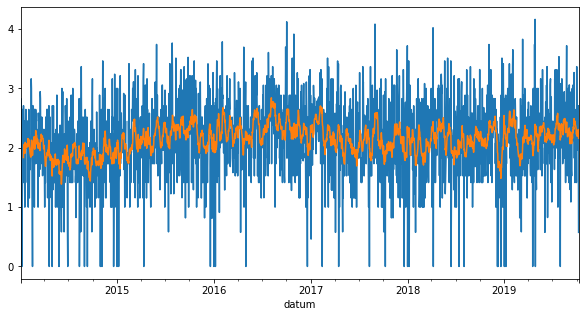

In [43]:
print('M01AB')
np.sqrt(df['M01AB']).plot()
np.sqrt(df['M01AB']).rolling(window=12).mean().plot(figsize = (10,5))

In [54]:

df['RollingAvgMeanPerYear'] = df.M01AB.rolling(365, min_periods=1).mean()


df['RollingAvgSTDPerYear'] = df.M01AB.rolling(365, min_periods=1).std()


Text(0, 0.5, 'sales')

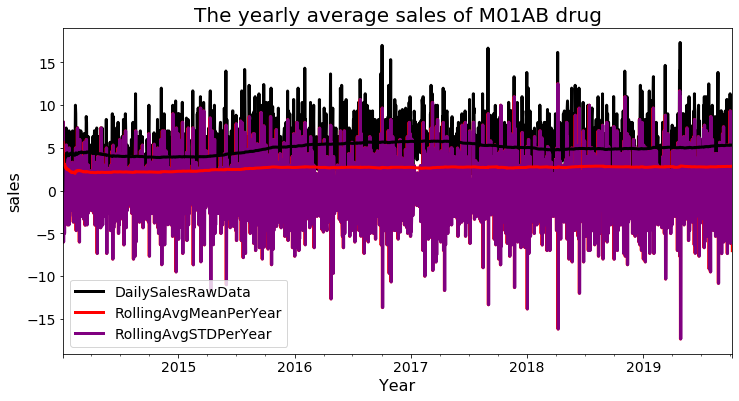

In [55]:

colors = ['black', 'red', 'purple']

df.plot(color=colors, linewidth=3, figsize=(12,6))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(labels =['DailySalesRawData', 'RollingAvgMeanPerYear', 'RollingAvgSTDPerYear'], fontsize=14)

plt.title('The yearly average sales of M01AB drug', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('sales', fontsize=16)

## ACF and PACF




























































































